In [2]:
import numpy as np
import GPy
import matplotlib.pyplot as plt
import scipy.linalg 
import matplotlib as mpl
#mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['figure.figsize'] = (7,5)

We use the following kernel:
$$
k(t,t') = \sigma_x^2 \min\{t,t'\}
$$
Here we assume that $\sigma_0^2 = 0$. This means that the starting point of the particle is known without error

In [8]:
# Define Kernel
d = 1       # input dimension
sigma_x_sq = 1     # prior variance
k = GPy.kern.Brownian(d, sigma_x_sq)


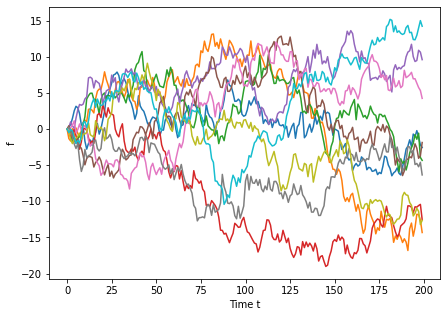

In [9]:
# Sample Xs and Functions
T = 200
ts = np.arange(T)[:,None]
mu = np.zeros(T) # vector of the means
K_AA = k.K(ts,ts) # covariance matrix
# Generate 20 sample path with mean mu and covariance C
plt.figure()  
for i in range(10):
    f_plot = np.random.multivariate_normal(mu,K_AA)
# open new plotting window
    plt.plot(ts, f_plot,'-')

plt.xlabel("Time t")
plt.ylabel("f")
plt.show()

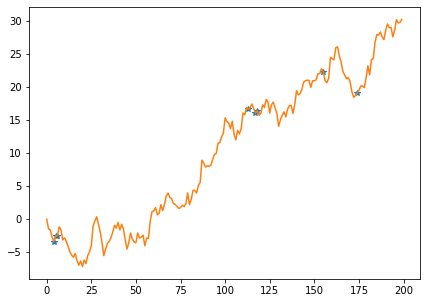

In [12]:
# Sample Data
sigma_y_sq = 0
f = np.random.multivariate_normal(mu,K_AA)
ts_r = np.array([4,5,6,113,117,118,155,174])
y_r = f[ts_r] + np.random.normal(0, sigma_y_sq,ts_r.shape[0])
plt.plot(ts_r, y_r, '*')
plt.plot(ts, f, '-')
plt.show()

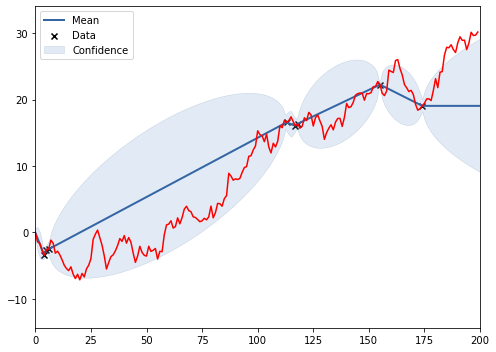

In [13]:
# Fitting a GP

# regression model
sigma_x_sq_reg = sigma_x_sq   # prior variance
sigma_y_sq_reg = sigma_y_sq    # noise

k_reg = GPy.kern.Brownian(d, sigma_x_sq_reg)

m = GPy.models.GPRegression(X = ts_r[:, None], Y = y_r[:, None], kernel = k_reg, noise_var= sigma_y_sq_reg)
m.plot()
plt.plot(np.sort(np.squeeze(ts)),np.squeeze(f),'r')
x1,x2,y1,y2 = plt.axis()  
plt.axis((0,200,y1,y2))
plt.show()

In [65]:
y_r[:, None]
ts_r

array([ 1,  4,  5,  6, 13, 17])